**Modeling Trikafta Transfer from Maternal Plasma to Breast Milk**

This notebook models the pharmacokinetics of Trikafta (a cystic fibrosis drug) in a breastfeeding context. The goal is to simulate how the drug concentration in a mother’s blood translates into the amount that appears in breast milk over time.

Using a simplified ordinary differential equation (ODE) system, the model estimates:

* The decay of maternal plasma concentration following daily dosing

* The transfer rate of Trikafta into breast milk

* The subsequent clearance or dissolution of the drug in milk

All parameters are illustrative and based on rough scaling or heuristic adjustment rather than clinical data (because not much was available). The project focuses on demonstrating the mathematical modeling process—from formulating an ODE, solving it numerically with scipy.integrate.solve_ivp, and visualizing the resulting pharmacokinetic profiles using matplotlib.

This kind of modeling approach could be extended to incorporate more detailed absorption, distribution, metabolism, and excretion (ADME) parameters if experimental or literature data were available.

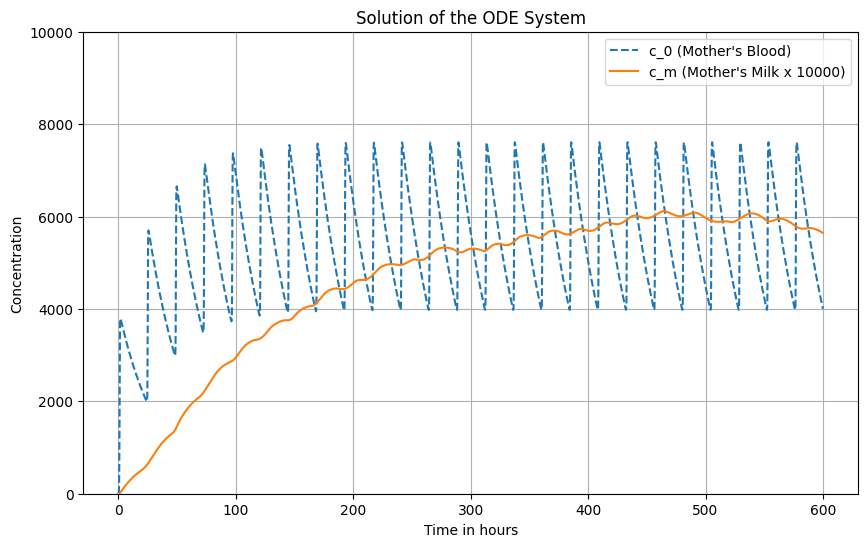

0.46269437643778055


In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Time points
time_points = np.linspace(0, 600, 20000) # Up to 600 hours

# Mother's blood concentration
f = lambda x: np.exp( (np.log(0.5) * x)/24)
g = lambda x: 20000/(1 + np.exp(-8 * (x-1)))
h = lambda x: f(x) * g(x)
j = lambda x: np.floor(x / 24).astype(int)

def q(x):
    x = np.asarray(x)  # Ensure x is an array
    total = np.zeros_like(x)
    for i in range(np.max(j(x)) + 1):  # Use max value to loop correctly
        mask = j(x) >= i  # Ensure valid indexing
        total[mask] += h(x[mask] - 24 * i)
    return total / 5

c_0 = q(time_points) # Modelling mom's concentration

# Initial condition
initial_conditions = [0] # Both mom and baby will start with (an arbitrary) zero amount of the drug in their system

# Define ODE system correctly
def system_1(t, y):
    c_0_t = np.interp(t, time_points, c_0)  # Interpolate c_0 for any t
    from_mom = 0.000001 # About how much baby gets from mom (needs more data)
    dissolve_rate = 0.01 # How quickly it disappears in breast milk (had to fiddle around with this to find a good percentage)
    return [from_mom * c_0_t - dissolve_rate * y]

# Solve the ODE
sol1 = solve_ivp(system_1, [time_points[0], time_points[-1]], initial_conditions, t_eval=time_points)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, q(time_points), label='c_0 (Mother\'s Blood)', linestyle='dashed')
plt.plot(sol1.t, sol1.y[0] * 10000, label='c_m (Mother\'s Milk x 10000)', linestyle='solid')

plt.xlabel('Time in hours')
plt.ylabel('Concentration')
plt.ylim(0, 10000)
plt.title('Solution of the ODE System')
plt.legend()
plt.grid(True)
plt.show()
print(np.average(sol1.y[0])) # Need to be around 0.5 to match lab data